## CAR PRICE PREDICTION DATA SCIENCE PROJECT - 3
The project trains a car price prediction model while considering factors listed wherever necessary.
Given dataset titled "car data" consists of necessary information needed to make a predictive model and train it.

In [20]:
#Importing necessary libraries/packages

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## DATA EXPLORATION

In [21]:
#Data Extraction : 

d=pd.read_csv("car data.csv")

In [22]:
s=d.shape
print("There are",s[0],"number of rows and",s[1],"number of columns in the given dataset")

There are 301 number of rows and 9 number of columns in the given dataset


In [23]:
# Data Column (Variables)

col=d.columns
print("Columns are : \n")
for i in col:
    print(i)

Columns are : 

Car_Name
Year
Selling_Price
Present_Price
Driven_kms
Fuel_Type
Selling_type
Transmission
Owner


Our target variable is "Selling_Price"

In [24]:
d.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [25]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [26]:
d.head()    #Checking first 5 rows of the dataset

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [27]:
d.tail()     #Checking last 5 rows of dataset

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


## UNIVARIATE ANALYSIS

In [28]:
d.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [29]:
data=d['Car_Name'].value_counts()
print(data.head(49))             #Splitting data so that all rows can be viewed.
print(data.tail(49))

Car_Name
city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3

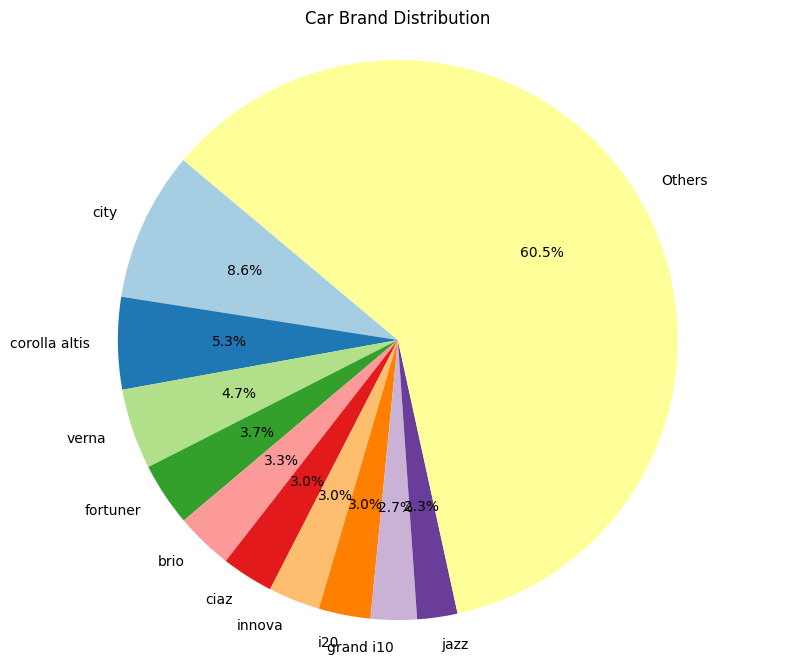

In [30]:
#Pie chart representation of top 10 car models
top_10 = 10
top_count = d['Car_Name'].value_counts().nlargest(top_10)
top_count['Others'] = d['Car_Name'].value_counts().iloc[top_10:].sum()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_count, labels=top_count.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Car Brand Distribution')
plt.axis('equal')  
plt.show()

We can infer that the top selling car type is "City"

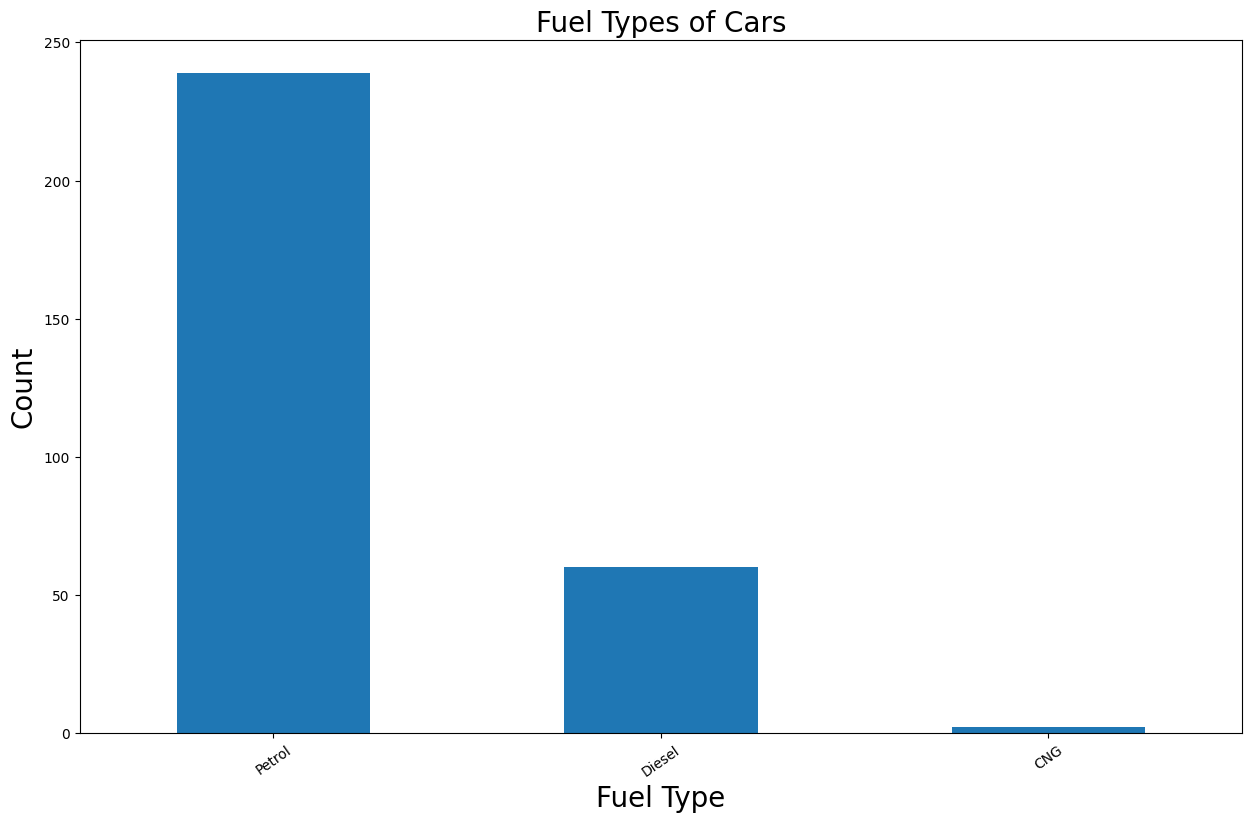

In [31]:
plt.figure(figsize=(15,9))
d['Fuel_Type'].value_counts().plot.bar()
plt.title("Fuel Types of Cars", fontsize=20)
plt.xlabel("Fuel Type",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xticks(rotation=35)
plt.show()

We infer that most cars are "Petrol" type.

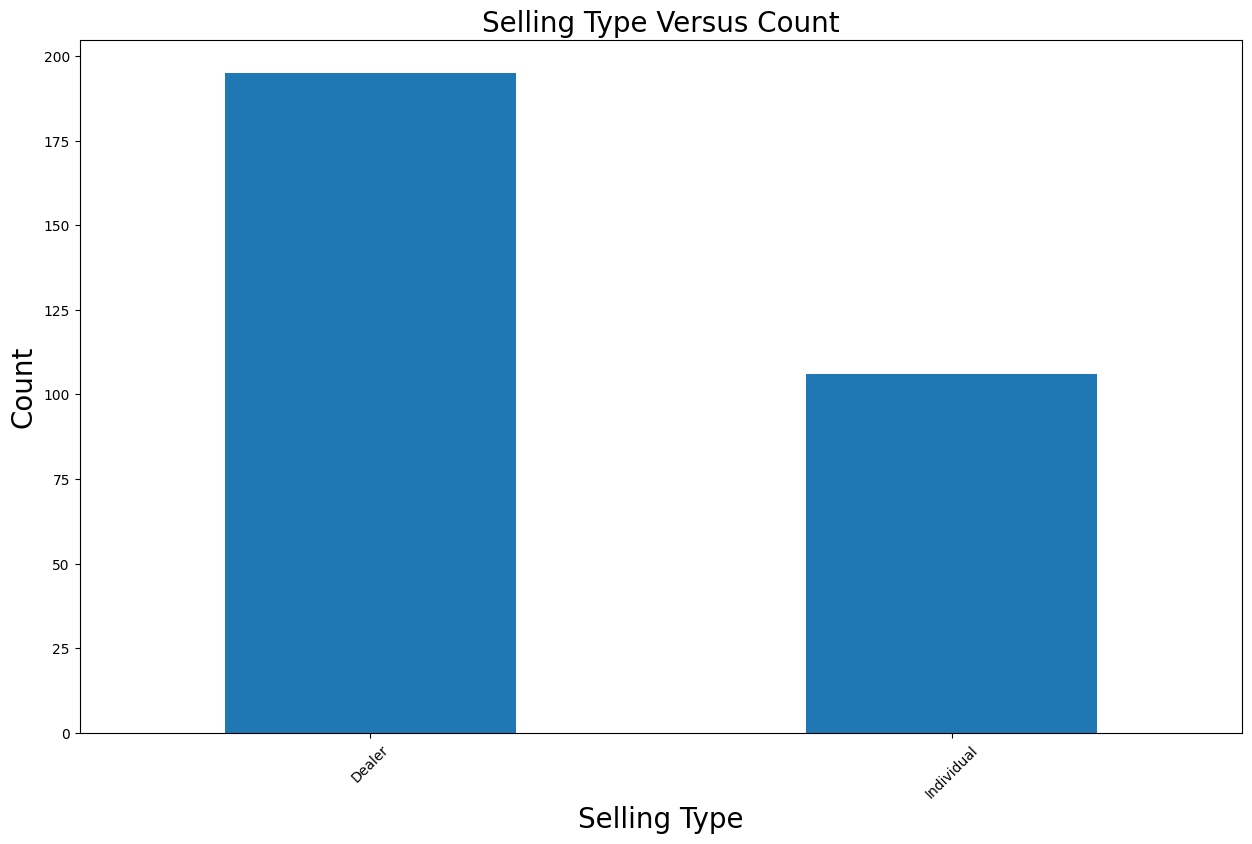

In [32]:
plt.figure(figsize=(15,9))
d['Selling_type'].value_counts().plot.bar()
plt.title("Selling Type Versus Count",fontsize=20)
plt.xlabel("Selling Type",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xticks(rotation=45)
plt.show()

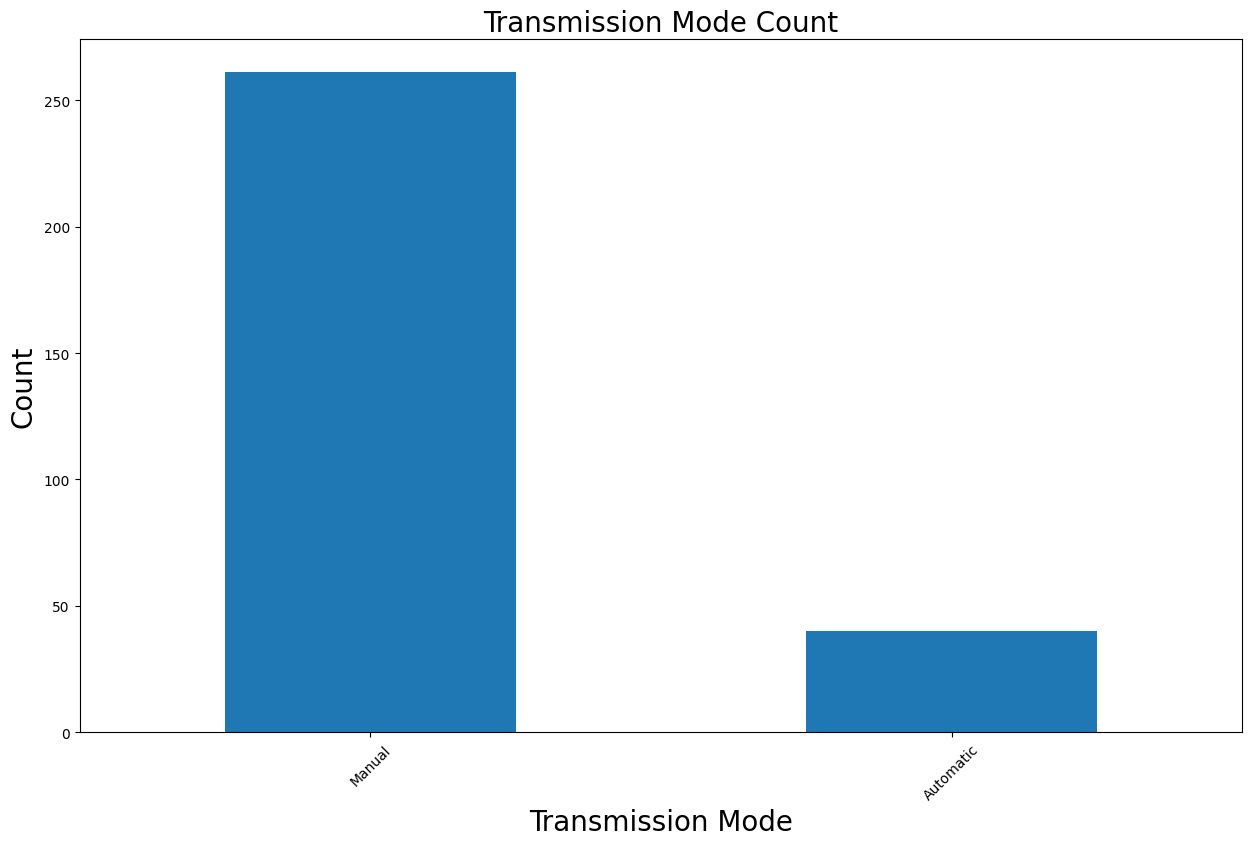

In [33]:
plt.figure(figsize=(15,9))
d['Transmission'].value_counts().plot.bar()
plt.title("Transmission Mode Count",fontsize=20)
plt.xlabel("Transmission Mode",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xticks(rotation=45)
plt.show()

Most cars' transmission type is "Manual"

<Axes: xlabel='Year', ylabel='Density'>

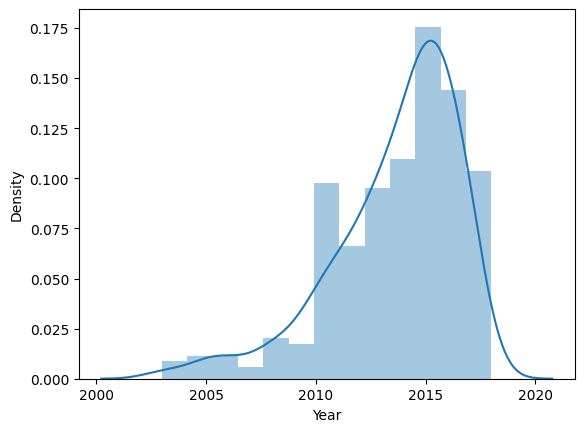

In [34]:
sn.distplot(d['Year'])

<Axes: xlabel='Selling_Price', ylabel='Density'>

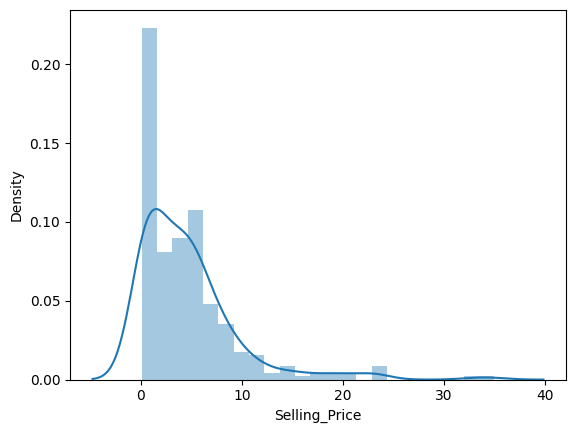

In [35]:
sn.distplot(d['Selling_Price'])

<Axes: xlabel='Present_Price', ylabel='Density'>

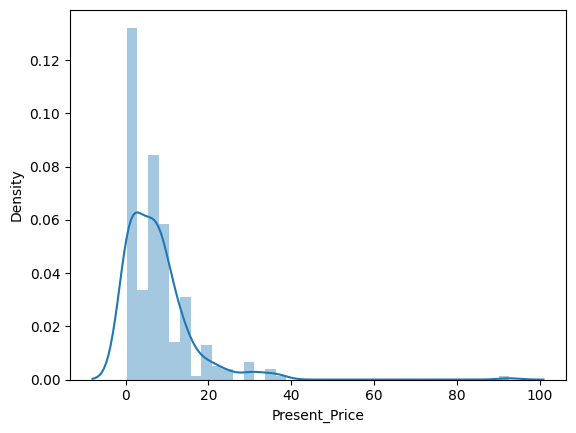

In [36]:
sn.distplot(d['Present_Price'])

<Axes: xlabel='Driven_kms', ylabel='Density'>

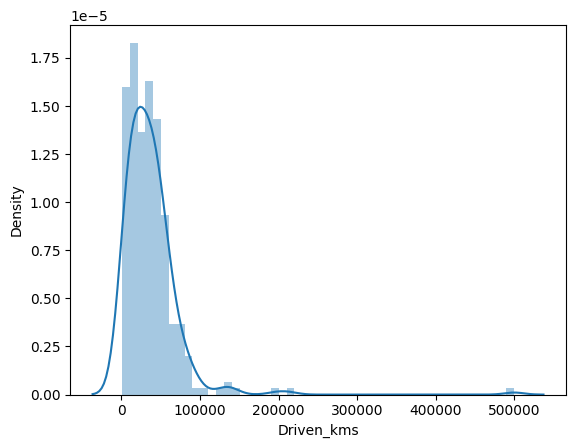

In [37]:
sn.distplot(d['Driven_kms'])

## BIVARIATE ANALYSIS

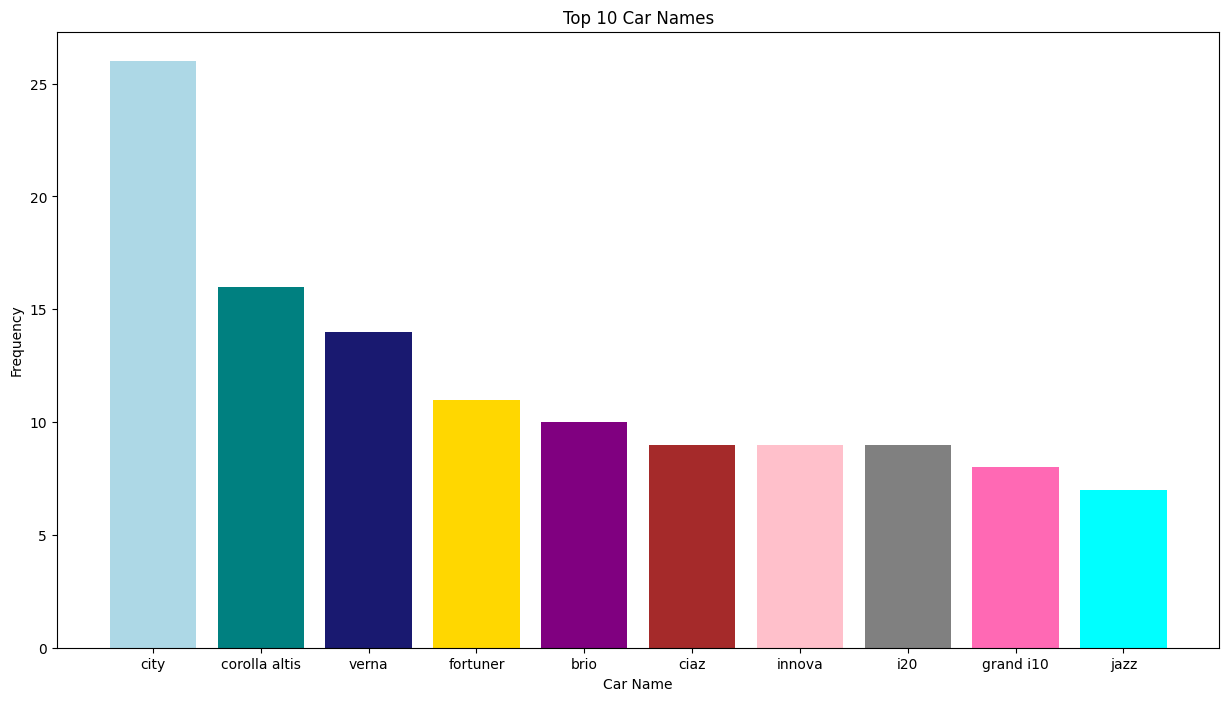

In [38]:
top_10 = 10
top_count = d['Car_Name'].value_counts().nlargest(top_10)
colors = ["lightblue", "teal", "midnightblue", "gold", "purple", "brown", "pink", "gray", "hotpink",
                "cyan"]

plt.figure(figsize=(15, 8))
plt.bar(top_count.index, top_count.values, color=colors)

plt.xlabel('Car Name')
plt.ylabel('Frequency')
plt.title('Top 10 Car Names')

plt.show()

In [39]:
d1=pd.crosstab(d['Car_Name'],d['Fuel_Type'])  # cross-tabulation between car type and fuel type
print(d1.head(49))                            #Splitting dataset as it contains 98 rows of data
print("\n")
print(d1.tail(49))                            # output viwed in scrollable format

Fuel_Type                  CNG  Diesel  Petrol
Car_Name                                      
800                          0       0       1
Activa 3g                    0       0       2
Activa 4g                    0       0       1
Bajaj  ct 100                0       0       1
Bajaj Avenger 150            0       0       1
Bajaj Avenger 150 street     0       0       1
Bajaj Avenger 220            0       0       3
Bajaj Avenger 220 dtsi       0       0       2
Bajaj Avenger Street 220     0       0       1
Bajaj Discover 100           0       0       1
Bajaj Discover 125           0       0       2
Bajaj Dominar 400            0       0       1
Bajaj Pulsar  NS 200         0       0       1
Bajaj Pulsar 135 LS          0       0       1
Bajaj Pulsar 150             0       0       4
Bajaj Pulsar 220 F           0       0       2
Bajaj Pulsar NS 200          0       0       3
Bajaj Pulsar RS200           0       0       1
Hero  CBZ Xtreme             0       0       1
Hero  Ignitor

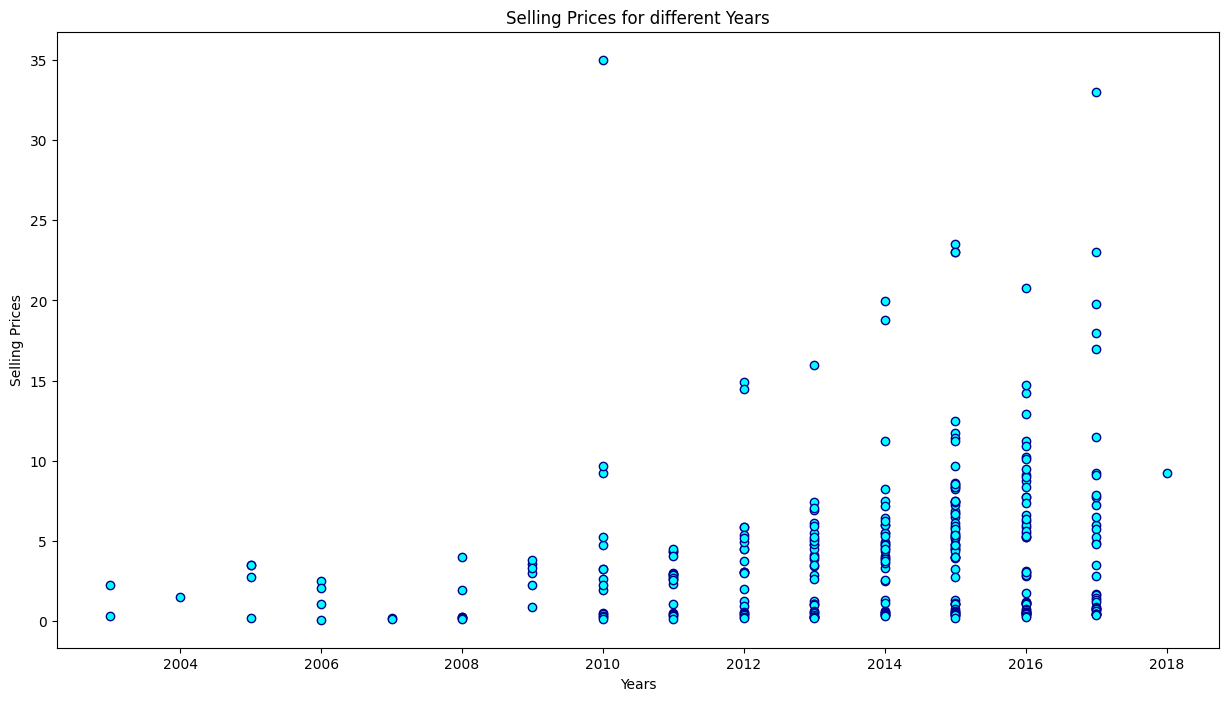

In [40]:
plt.figure(figsize=(15,8))
plt.scatter(d['Year'],d['Selling_Price'],color='cyan',edgecolor='darkblue',marker='o')
plt.title("Selling Prices for different Years")
plt.xlabel("Years")
plt.ylabel("Selling Prices")
plt.show()

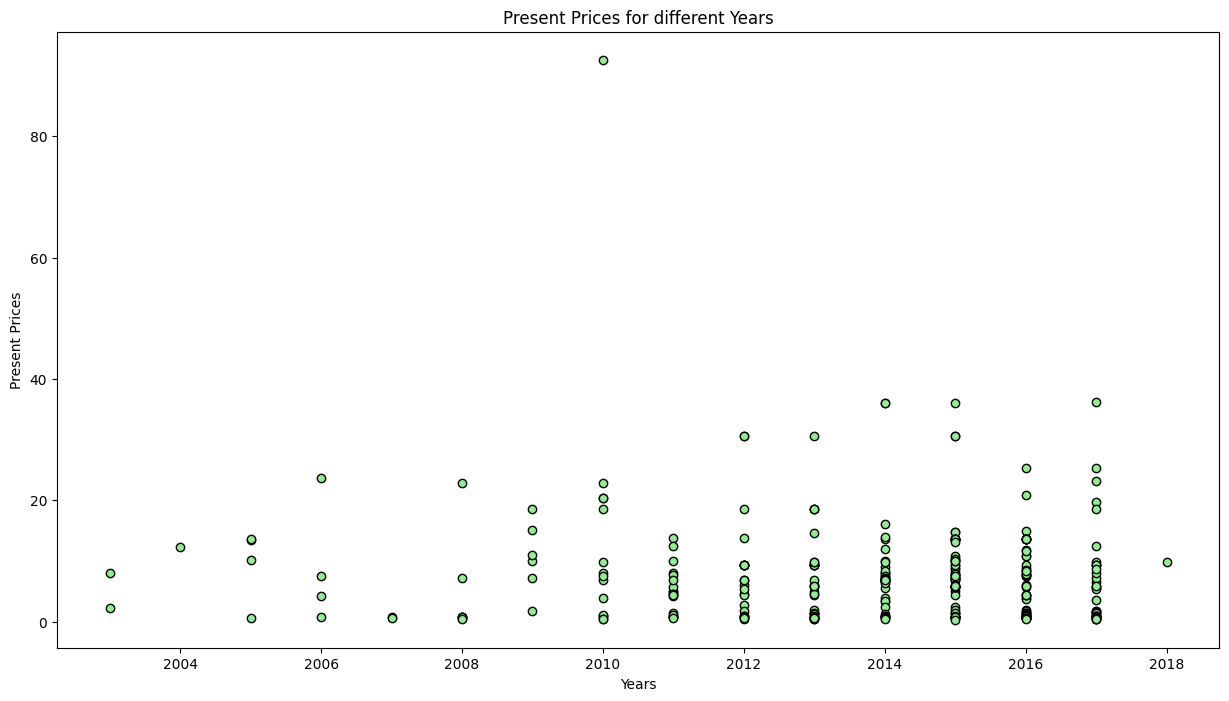

In [41]:
plt.figure(figsize=(15,8))
plt.scatter(d['Year'],d['Present_Price'],color='lightgreen',edgecolor='black',marker='o')
plt.title("Present Prices for different Years")
plt.xlabel("Years")
plt.ylabel("Present Prices")
plt.show()

In [42]:
# Changing strings to numeric 
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
d['Fuel_Type'] = l.fit_transform(d['Fuel_Type'])
d['Selling_type'] = l.fit_transform(d['Selling_type'])
d['Transmission'] = l.fit_transform(d['Transmission'])

<Axes: >

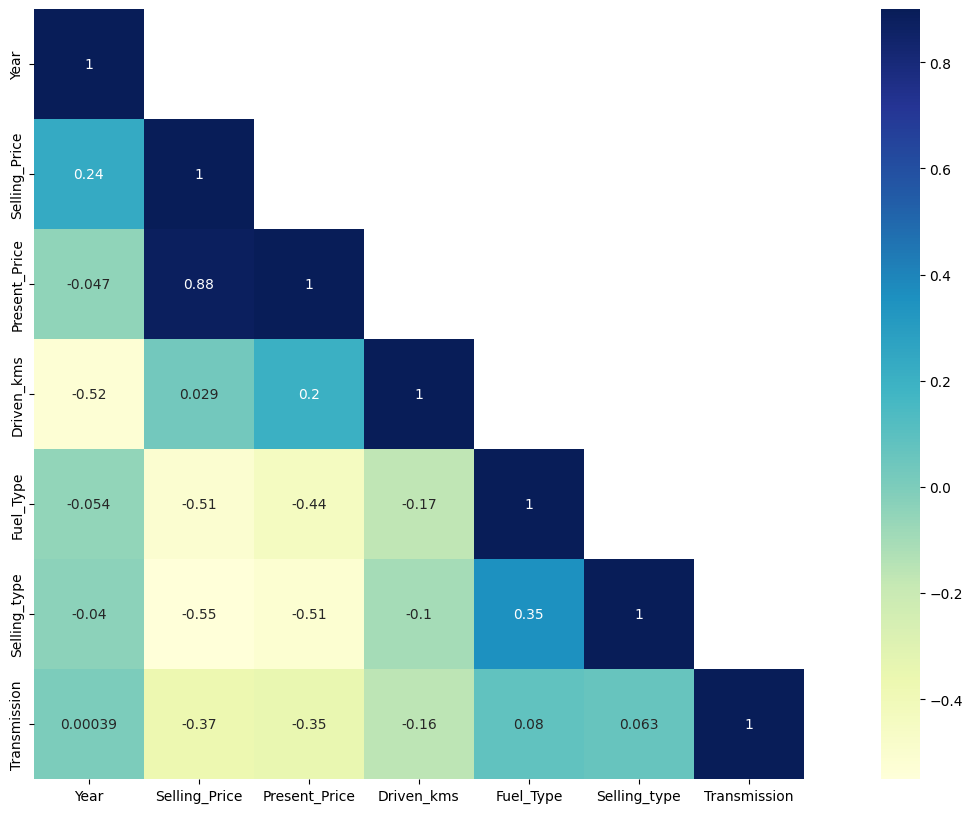

In [43]:
corr = d[['Year','Selling_Price','Present_Price','Driven_kms','Fuel_Type','Selling_type','Transmission']].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

Selling Price has high positive correlation with Present Price. Selling type and selling price have a high negative correlation.

Year
2003     2.25
2004     1.50
2005     3.51
2006     2.50
2007     0.20
2008     4.00
2009     3.80
2010    35.00
2011     4.50
2012    14.90
2013    16.00
2014    19.99
2015    23.50
2016    20.75
2017    33.00
2018     9.25
Name: Selling_Price, dtype: float64


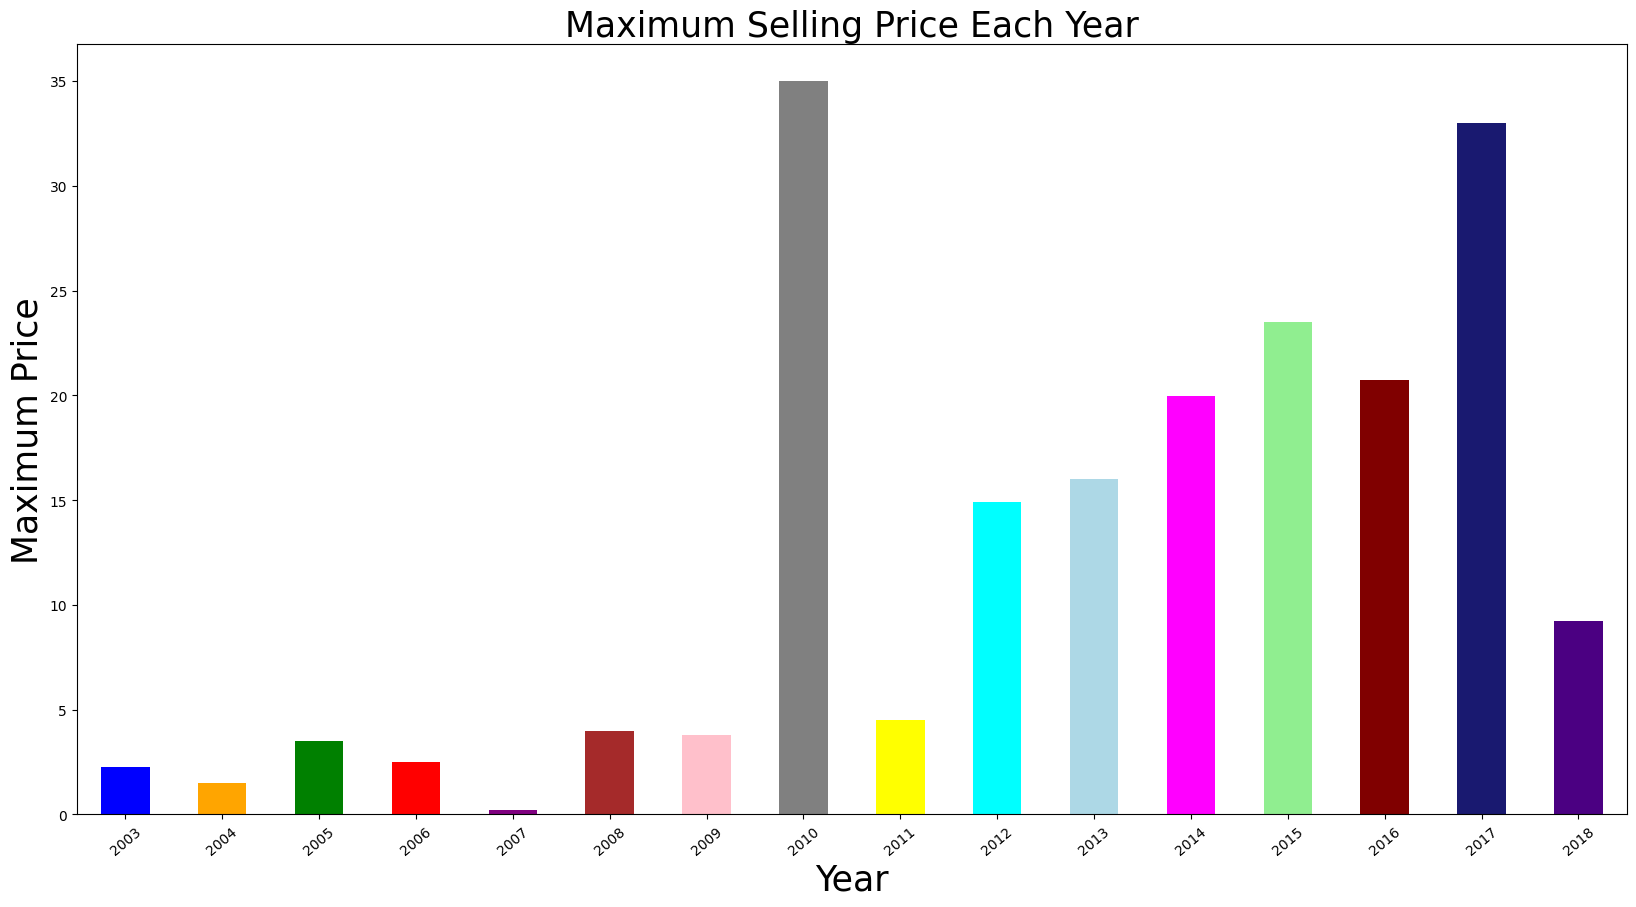

In [44]:
max_selling_price_per_year=d.groupby('Year')['Selling_Price'].max()
print(max_selling_price_per_year)

#Bar Graph Representation :
colors = [  
            "blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "yellow",
            "cyan", "lightblue", "magenta", "lightgreen", "maroon", "midnightblue", "indigo"
         ]


max_selling_price_per_year.plot(kind="bar", figsize=(20, 10), color=colors)
plt.title("Maximum Selling Price Each Year",fontsize=25)
plt.xlabel("Year",fontsize=25)
plt.ylabel("Maximum Price",fontsize=25)
plt.xticks(rotation=40)
plt.show()

From the above bar plot we infer that in the year 2010 the Selling Price was amximum for one of the many brands of cars sold that year and equal to 35 units. The lowest price being 0.20 in year 2007.

Year
2003     7.98
2004    12.35
2005    13.70
2006    23.73
2007     0.75
2008    22.78
2009    18.61
2010    92.60
2011    13.74
2012    30.61
2013    30.61
2014    35.96
2015    35.96
2016    25.39
2017    36.23
2018     9.83
Name: Present_Price, dtype: float64


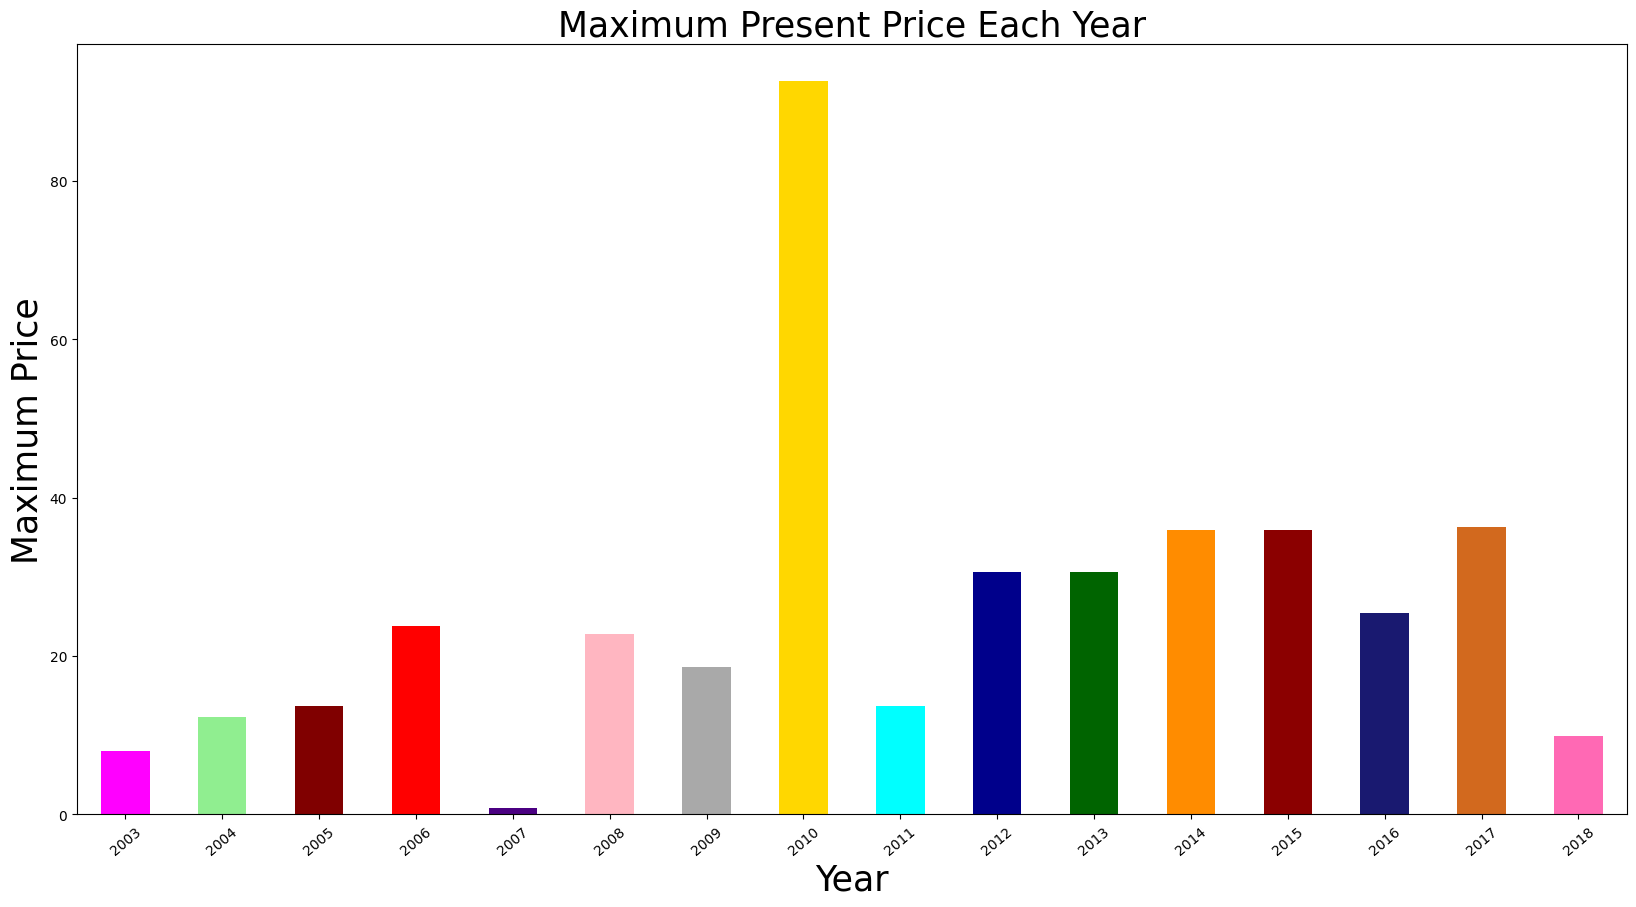

In [45]:
max_present_price_per_year=d.groupby('Year')['Present_Price'].max()
print(max_present_price_per_year)

#Bar Graph Representation :
custom_colors = [
                "magenta", "lightgreen", "maroon", "red", "indigo", "lightpink", "darkgray",
                "gold", "cyan", "darkblue", "darkgreen", "darkorange", "darkred", "midnightblue", "chocolate", "hotpink"
]

max_present_price_per_year.plot(kind="bar", figsize=(20, 10), color=custom_colors)
plt.title("Maximum Present Price Each Year",fontsize=25)
plt.xlabel("Year",fontsize=25)
plt.ylabel("Maximum Price",fontsize=25)
plt.xticks(rotation=40)
plt.show()

We infer from the above graph that in the year 2010, present price was maximum and equal to 92 units and lowest was around 0.75 in 2007.

Year
2003    127000
2004    135154
2005    197176
2006    142000
2007     53000
2008    500000
2009     87934
2010    213000
2011     88000
2012    104707
2013    135000
2014     83000
2015     68000
2016     50000
2017     38488
2018      2071
Name: Driven_kms, dtype: int64


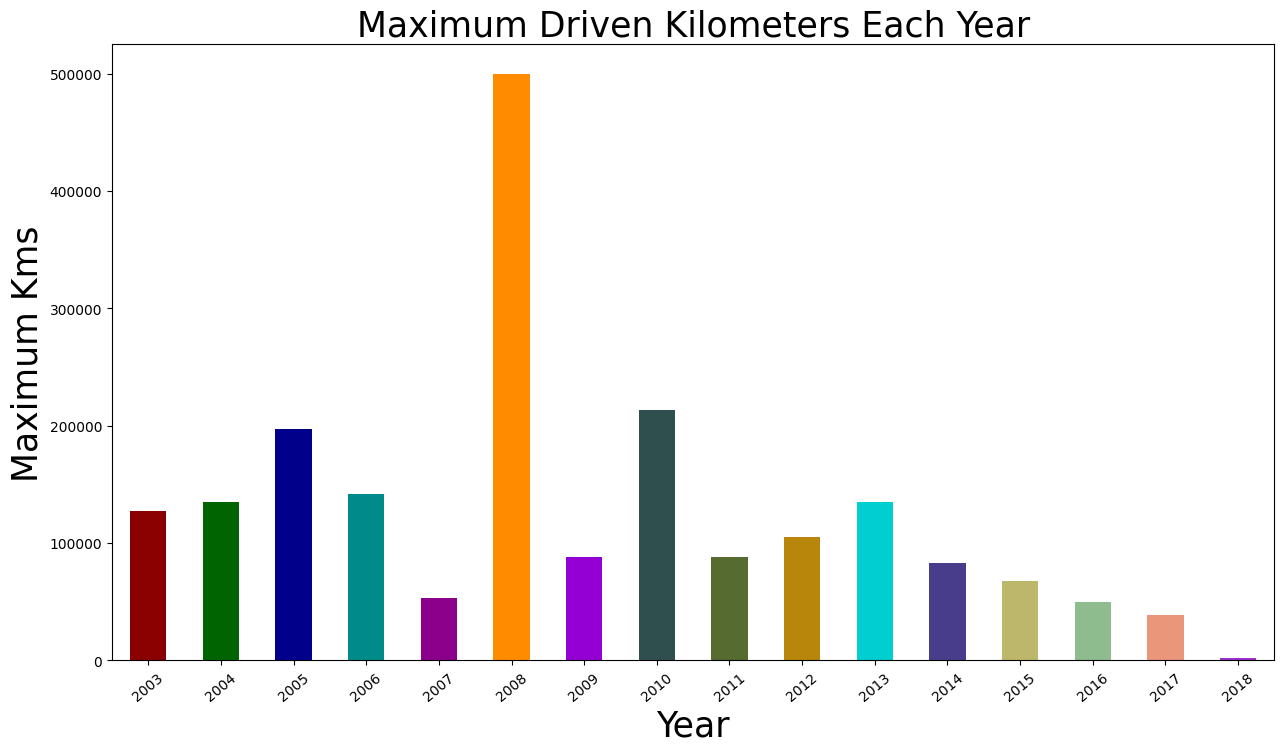

In [46]:
max_driven_kms_per_year=d.groupby('Year')['Driven_kms'].max()
print(max_driven_kms_per_year)

colors = [
    "darkred", "darkgreen", "darkblue", "darkcyan", "darkmagenta",
    "darkorange", "darkviolet", "darkslategray", "darkolivegreen", "darkgoldenrod",
    "darkturquoise", "darkslateblue", "darkkhaki", "darkseagreen", "darksalmon",
    "darkorchid", "brown", "darkred", "indigo", "teal"  ]

max_driven_kms_per_year.plot(kind="bar", figsize=(15,8),color=colors)
plt.title("Maximum Driven Kilometers Each Year",fontsize=25)
plt.xlabel("Year",fontsize=25)
plt.ylabel("Maximum Kms",fontsize=25)
plt.xticks(rotation=40)
plt.show()

We infer maximum driven kms was in year 2008 and around 500000 kms. Lowest was around 2071 kms in year 2018.

## MISSING VALUE DETECTION AND TREATMENT

In [47]:
d.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

Since we have no null values, we need not make any manipulations on the dataset.

## OUTLIER DETECTION AND TREATMENT

<Axes: >

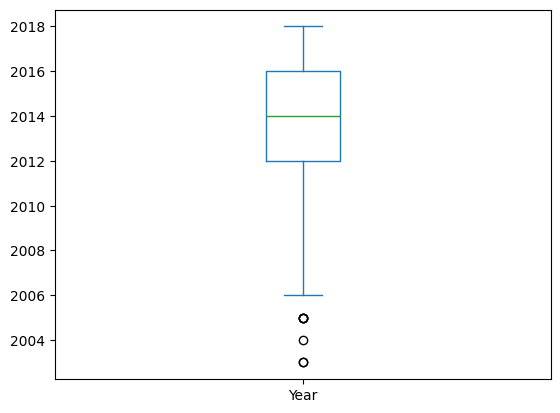

In [48]:
d['Year'].plot.box()

In [49]:
# Outlier detected and hence treated : 
d=d[d['Year']>2009]

<Axes: >

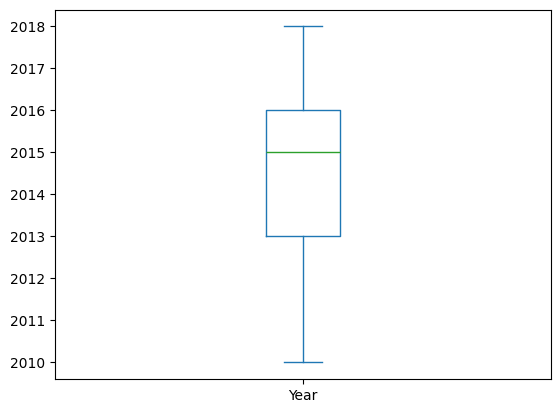

In [50]:
d['Year'].plot.box()

<Axes: >

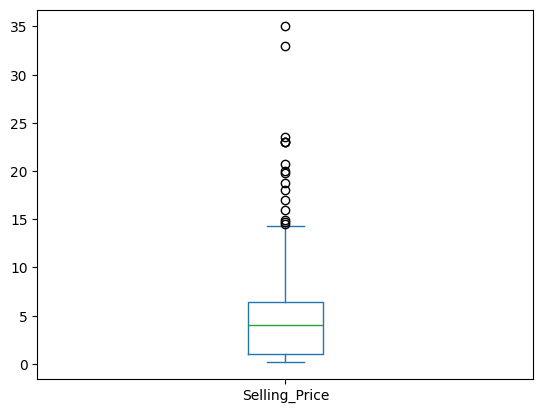

In [51]:
d['Selling_Price'].plot.box()

In [52]:
#Outlier detected and hence treated
d=d[d['Selling_Price']<13]

<Axes: >

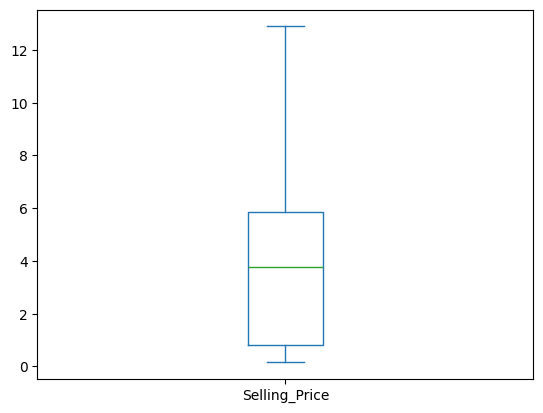

In [53]:
d['Selling_Price'].plot.box()

<Axes: >

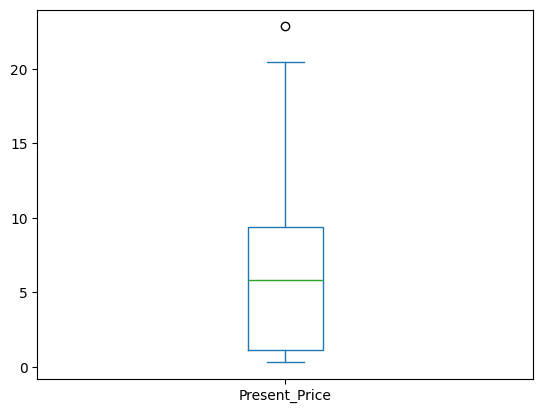

In [54]:
d['Present_Price'].plot.box()

In [55]:
#Outlier detected and hence treated
d=d[d['Present_Price']<=22]

<Axes: >

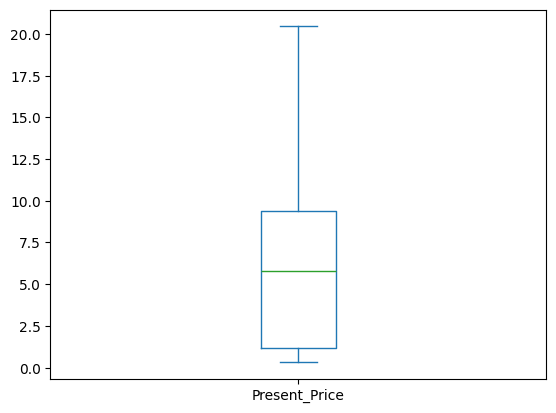

In [56]:
d['Present_Price'].plot.box()

<Axes: >

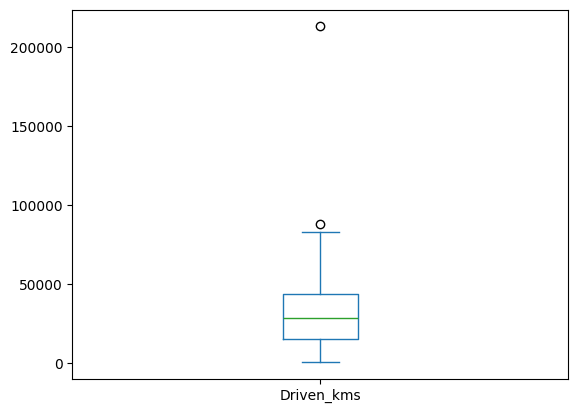

In [57]:
d['Driven_kms'].plot.box()

In [58]:
#Outlier detected and hence treated
d=d[d['Driven_kms']<85000]

<Axes: >

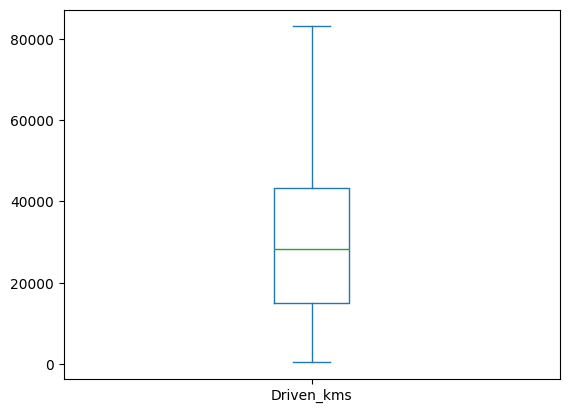

In [59]:
d['Driven_kms'].plot.box()

## MODEL BUILDING 

## 1. Linear Regression Model

Since the target variable "Selling_Price" is numeric, we make a linear regression model and test the accuracy of the model.

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [61]:
X = d.drop(['Car_Name', 'Selling_Price'], axis=1)          
y = d['Selling_Price'] 

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [63]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred=lreg.predict(X_test)

In [65]:
r2=r2_score(y_test,y_pred)
print("R-squared value obtained :",r2)

R-squared value obtained : 0.8954342371801579


R-Squared value obtained is equal to 89.5% indicating a fairly strong model.

In [66]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error :", mae)
print("Mean Squared Error :", mse)
print("Root Mean Squared Error :", rmse)

Mean Absolute Error : 0.6760050878687305
Mean Squared Error : 0.766342728416082
Root Mean Squared Error : 0.8754100344501895


The values of mean absolute error, mean squared error and root mean squared error are small and less than one, indicating predicted value have a difference from actual values by a unit less than 1; thereby our model being nearly accurate in predicting the selling price values.

## 2. DECISION TREE MODEL

In [67]:
from sklearn.tree import DecisionTreeRegressor

In [68]:
dtr=DecisionTreeRegressor(random_state=12)

In [69]:
X = d.drop(['Car_Name','Selling_Price'], axis=1)
y=d['Selling_Price']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [71]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=12)

In [72]:
y_pred=dtr.predict(X_test)

In [73]:
r2=r2_score(y_test, y_pred)
print("R-Squared value of decision tree regressor :",r2*100,"%")

R-Squared value of decision tree regressor : 94.8065300077203 %


R squared value for decision tree regressor is 94.8% ; significantly higher than linear regression indicating that this model performs much better than linear regression model.

In [74]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

print("Mean Absolute Error :",mae)
print("Mean Squared Error :",mse)
print("Root Mean Squared Error :",rmse)


Mean Absolute Error : 0.41058823529411775
Mean Squared Error : 0.3806196078431373
Root Mean Squared Error : 0.6169437639227237


Values of the errors ( Absolute, Mean Squared, Root Mean Squared ) are way less than 1 as compared with the same 3 values for linear regression model. Another indication that decision tree regressor is a better model.